## Sungwon Lee, Hyug her

## 2. Problem 8 in pages 222-223 (reworded in Python)

#### (a) Generate a simulated data set as follows:

In [123]:
import pandas as pd
import numpy as np
np.random.seed (2020)
x = np.random.normal(0,1,100)
y = x - 2 * x**2 + np.random.normal(0,1,100)

Here, n =  100, p = 2

The model used to generate the data is 

$Y = X - 2X^2 + e$ 

where e ~ N(0,1)

#### (b) Create a scatterplot of X against Y . Comment on what you find.

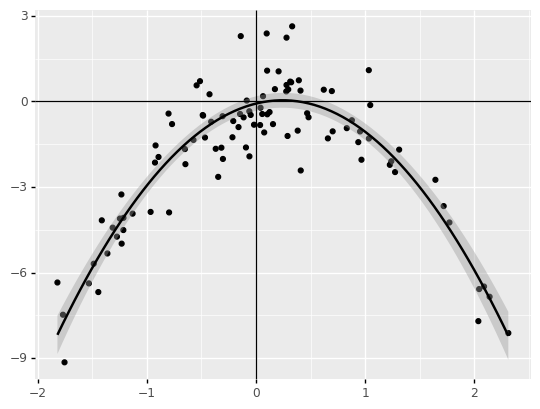

<ggplot: (180584282959)>

In [124]:
import plotnine as p9
import plotnine.mapping.aes

# create a plot using plotnine
(p9.ggplot(mapping = p9.aes(x=x, y=y)) + 
p9.geom_point() +
p9.geom_smooth(method="lm", formula="y ~ x + I(x**2)") +
p9.geom_hline(yintercept=0) +
p9.geom_vline(xintercept=0) 
)

Here, we can see the relationship that

$f(X) = X -2X^2$

$\Rightarrow f(X) = X(1-2X)$
$\Rightarrow f(X) = 0$ if and only if $X \in {0, 0.5}$

Thus, the critical points are

$f(X) = X - 2X^2$

$\Rightarrow f'(X) = 1-4X$
$\Rightarrow f'(X) = 0$ if and only if $X = 0.25$ 

Thus, the second deriviative of f(X) is $f''(0.25) = -4$ which is smaller than 0. Therefore 0.25 is the maximum. 

Also, we can see that there exists a quadratic relationship between x and y. 



#### (c) Set a random seed, and then compute the Leave-one-out-cross-validation (LOOCV) errors that result from fitting the following four models using least squares:

In [125]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as skl_lm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

In [126]:
np.random.seed(77)

x = np.random.normal(0,1,100)
y = x - 2 * x**2 + np.random.normal(0,1,100)

d = {'x':x, 'y':y}
df = pd.DataFrame(data=d) # create a dataframe

model = glm('y ~ x', df)  # 1st degree glm




In [127]:
lm = skl_lm.LinearRegression() # call linearregression model

x_arr = np.array(x).reshape(-1,1) # reshape to 100, 1
y_train = np.array(y).reshape(-1,1) # reshape to 100, 1


In [128]:
LOOCV = LeaveOneOut() # call LOO cross validation class
LOOCV.get_n_splits(x_arr) # split


100

In [129]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False) # splits into 10

# print LOOCV error from degree 1 to 5
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(x_arr)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree "+str(i) + ": " +  "LOOCV error: " + str(np.mean(np.abs(scores))))

Degree 1: LOOCV error: 8.36787371836318
Degree 2: LOOCV error: 1.0849190140250897
Degree 3: LOOCV error: 1.094284356219684
Degree 4: LOOCV error: 1.6303987393386312
Degree 5: LOOCV error: 3.5003856937014604


#### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [130]:
np.random.seed(777) # set another random seed

x = np.random.normal(0,1,100)
y = x - 2 * x**2 + np.random.normal(0,1,100)

d = {'x':x, 'y':y}
df = pd.DataFrame(data=d) # create a dataframe

lm = skl_lm.LinearRegression() # call linear regression model

x_arr = np.array(x).reshape(-1,1) # reshape to 100, 1
y_train = np.array(y).reshape(-1,1) # reshape to 100, 1

LOOCV = LeaveOneOut()
LOOCV.get_n_splits(x_arr)

# splits into 10
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)


# print LOOCV error from degree 1 to 5
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(x_arr)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree "+str(i) + ": " +  "LOOCV error: " + str(np.mean(np.abs(scores))))

Degree 1: LOOCV error: 6.660405738604948
Degree 2: LOOCV error: 0.9575999142891387
Degree 3: LOOCV error: 1.0054329380084486
Degree 4: LOOCV error: 1.103593039948956
Degree 5: LOOCV error: 1.5966516164923126


Yes, we could observe the same result as what we got in (c). The reason is that the LOOCV shows n folds of a single observation which means that it does not contain any randomness.

#### (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

The model with the degree of 2 had the smallest LOOCV error. We could easily expect this result since as we could see in the above scatter plot that the relation between x and y was quadratic. 

#### (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results? (use statsmodels to check the statistical significance)

In [131]:
from statsmodels.formula.api import glm


# create degree of 4 formula
formula4 = 'y ~ x + I(x**2) + I(x**3) + I(x**4)'

# use statsmodel glm to see the summary and compare
model = glm(formula4, df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       95
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                         0.94468
Method:                          IRLS   Log-Likelihood:                -136.48
Date:                Sat, 12 Mar 2022   Deviance:                       89.745
Time:                        08:04:52   Pearson chi2:                     89.7
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9980
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0011      0.144      0.007      0.994      -0.281       0.283
x              0.9504      0.188      5.047      0.000       0.581       1.319
I(x ** 2)     -1.9558      0.220     -8.879      0.000      -2.388      -1.524
I(x ** 3)      0.0295      0.066      0.444      0.657      -0.101       0.160
I(x ** 4)      0.0031      0.050      0.062      0.951      -0.095       0.101
==============================================================================
"""

The result above agrees with the conclusion drawn based on the cross-validation results. Here, the p-value shouls that only linear and quadratic terms are 0, which refers that they are statistically significant, whereas the cubic and 4th degree terms are not statistically significant. 